In [1]:
# here is link to the dataset: https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza?resource=download
# Group Members: Cameron Tofani, Liv Tirjan, Avi Oberoi
#chat.gpt used for syntax + coding help

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/ML_LAB2"))
#this should print pizza_not_pizza

['pizza_not_pizza', 'Untitled document.gdoc', 'Lab2Pizza.ipynb']


In [4]:
#make data accessible from /content/pizza_not_pizza so we dont have to use this long link
!ln -s "/content/drive/MyDrive/Colab Notebooks/ML_LAB2/pizza_not_pizza" /content/

#Business Understanding

The "Pizza or Not Pizza?" dataset consists of approximately 1,000 images of pizzas and 1,000 images of various other dishes, giving us a straightforward binary image classification task. Based on the image features, classification should be able to look at an image and decide if it is pizza or not pizza. This dataset includes a folder labeled "pizza" and a folder labeled "not_pizza", which are used to load in the data and assign them appropriate labels.

**Purpose of the Dataset**

This dataset was made to assist in developing and evaluating machine learning models capable of distinguishing between images of pizzas and non-pizza food items. This binary classification challenge serves as a good introduction for those new to image classification (like us), offering a manageable yet practical problem to solve.

**Prediction Task and Interested Third Parties**

The primary prediction task involves classifying images as either "pizza" or "not pizza." Third parties that might find the results valuable include:

- Restaurant and Food Delivery Services: Implementing automated systems to identify and categorize food items in images can enhance menu management and customer experience.

- Social Media Platforms: Accurately tagging and categorizing food images can improve content organization and user engagement.

- Diet and Nutrition Applications (ex. MyFitnessPal, CarbManager, etc.): Recognizing specific foods in user-uploaded images can assist in tracking dietary habits and providing nutritional information.

**Importance of the Data**

Incorporating image recognition capabilities into apps can significantly enhance user interaction and operational efficiency. For instance, food delivery services can streamline the ordering process by automatically identifying dishes, while social media platforms can offer improved content tagging and search functionalities. Moreover, diet and nutrition apps can provide users with accurate dietary assessments based on the food items detected in their photos.

**Performance Expectations**

For the prediction algorithm to be deemed useful to the identified third parties, it should achieve a high level of accuracy, ideally above 90%. Such performance ensures reliable integration into applications where incorrect classifications could lead to user dissatisfaction or operational inefficiencies. Achieving this level of accuracy may require advanced modeling techniques, extensive training data, and rigorous validation processes.

# Data Preperation


**DATA PREPARATION: [.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary.**


Image data shape: (1966, 3, 256, 256)
Labels shape: (1966,)


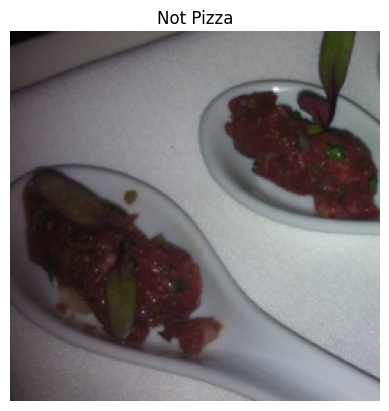

In [5]:
#this works but it takes awhile to run (has taken up to 5 minutes for me)
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

# (resize (default is 512, takes forever, 256 is fine), convert to tensor)
transform = transforms.Compose([
    transforms.Resize((256, 256)), #can change this to 128 to 128 for faster
    transforms.ToTensor()  # Convert to PyTorch tensor
])

dataset = datasets.ImageFolder(root="/content/pizza_not_pizza", transform=transform)

# convert to NumPy arrays
#X is the actual image values (pixels) and Y is the labels (pizza or not pizza)
X = torch.stack([img[0] for img in dataset]).numpy()  # images to numpy
y = np.array([img[1] for img in dataset])  # labels as numpy array

# Print dataset shape
print("Image data shape:", X.shape)  # (num_images, 3, 256, 256) (3 is RGB channels)
print("Labels shape:", y.shape)  # (num_images,)

# Display a sample image
plt.imshow(X[0].transpose(1, 2, 0)) #changes (height, width, channels) for matplotlib
plt.title("Not Pizza" if y[0] == 0 else "Pizza")
plt.axis("off")
plt.show()


IMPORTANT NOTE FOR CODING:
 y[i] == 0 is **NOT** pizza!
 y[i] == 1 **IS** pizza

 ex:  If y = [0, 1, 0, 1], then pizza_indices = [1, 3] (because y[1] == 1 and y[3] == 1)

 ex: If y = [0, 1, 0, 1], then not_pizza_indices = [0, 2] (because y[0] == 0 and y[2] == 0).

**DATA PREPARATION: [.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).**

Note: When loading in the dataset and visualizing the images (the 18 images loaded below), we want to see the images in color. However, for performing PCA and other analysis like feature extraction, we may want to use greyscale to speed up this process (1 dimension instead of 3). Feature extraction is more reliant on shape and texure moreso than color, so this is okay to do. Therefore, when flattening the images we will flatten them in greyscale.

In [6]:
#instead of image data being Image data shape: (3, 256, 256), we want to "flatten" this into 1x256x256 = 65536

# change images to grayscale before flattening
X_grayscale = np.dot(X.transpose(0, 2, 3, 1), [0.2989, 0.5870, 0.1140])  # using standard grayscale conversion

images_flattened = X_flattened = np.array([img.flatten() for img in X_grayscale])  # flatten each image in greyscale
print("Flattened image shape:", X_flattened.shape)  # should be (num_images, 256*256)

Flattened image shape: (1966, 65536)


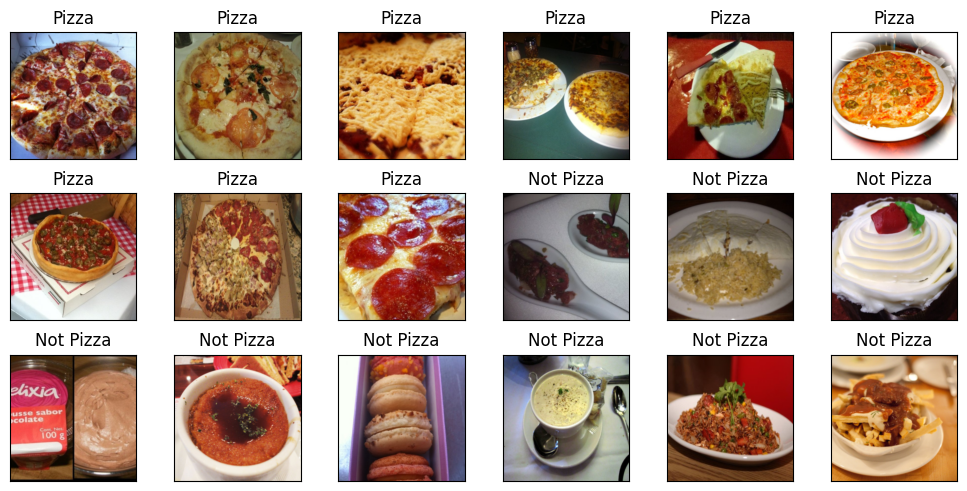

In [7]:
# [.1 points] Visualize several images.

#code taken/modified from "MachineLearningNotebooks 04. Dimension Reduction and Images.ipynb" by eclarson
#modifications: 1. changed labeling to account for pizza labels
# 2. original used titles[i], changed to y which is our image labels
# 3. took away controlling image size dynamically, dont need (no n_row or n_col)
# 4. selected 9 images from pizza, 9 images from not_pizza to display
# 5. did .transpose to allow for color images instead of greyscale

#find 9 indices to select from pizza, 9 from not pizza
pizza_indices = [i for i in range(len(y)) if y[i] == 1]
not_pizza_indices = [i for i in range(len(y)) if y[i] == 0]

def plot_gallery(images, labels, num_images=9):
    """Helper function to plot a gallery of Pizza and Not Pizza images"""
    plt.figure(figsize=(10, 5))

    # choose first `num_images` from each class
    selected_indices = pizza_indices[:num_images] + not_pizza_indices[:num_images]

    for i, img_idx in enumerate(selected_indices):
        plt.subplot(3, 6, i + 1)  # 3 rows, 6 columns instead of n_row + n_col

        img = images[img_idx].transpose(1, 2, 0)
        label = "Pizza" if labels[img_idx] == 1 else "Not Pizza"

        plt.imshow(img)
        plt.title(label, size=12)
        plt.xticks(())
        plt.yticks(())

    plt.tight_layout() #makes sure plots dont overlap and titles show right
    plt.show()

plot_gallery(X, y)

# Data Reduction


**[.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.**

Time taken: 48.7483 seconds


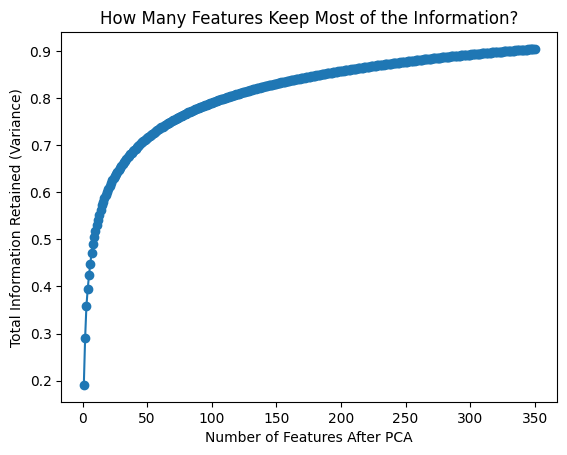

Optimal number of components: 329


In [8]:
from sklearn.decomposition import PCA
import time

#PCA on flattened images (grayscale)
def perform_pca(data, n_components=350):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    return pca, explained_variance

start = time.time()

pca, explained_variance = perform_pca(X_flattened)

end = time.time()

print(f"Time taken: {end - start:.4f} seconds")

# Visualizing explained variance
#this plots how much info is retained as we increasse the # of PCA components
#helps decide optimal # of components to use (rather than all 65,536 features)

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Features After PCA')
plt.ylabel('Total Information Retained (Variance)')
plt.title('How Many Features Keep Most of the Information?')
plt.show()

# Determine optimal number of components
# we want to keep at least 90% of the info from the images
# finds the smallest number of components needed to capture this

threshold = 0.90  # 90% variance
optimal_components = np.argmax(explained_variance >= threshold) + 1
print(f'Optimal number of components: {optimal_components}')

**Analysis and Conclusion:** We performed Principal Component Analysis (PCA) to reduce the dimensionality of our image dataset while retaining as much meaningful information as possible. Initially, with 50 components, we retained approximately 71% of the variance, indicating significant information loss. Increasing to 300 components improved retention to 89%, and further increasing to 400 components captured 93% of the variance. Finally, at 600 components, we observed that 558 components retained 94% variance, meeting our original threshold (94%) for adequate representation. While 600 components provided slightly better retention (94.47%), it came at the cost of longer computation time (86 seconds, nearly double that of 300 components). Given the balance between computational efficiency and variance retention, we referenced Dr. Eric Larson’s work, where he retained 300 components, and decided that keeping 330 components—which achieves slightly above 90% variance—is a reasonable trade-off between accuracy and performance. This dimensionality reduction allows us to represent the dataset with far fewer features while still maintaining the majority of the original information, making subsequent machine learning tasks more efficient.

**[.5 points] Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.**

Time taken: 31.4729 seconds


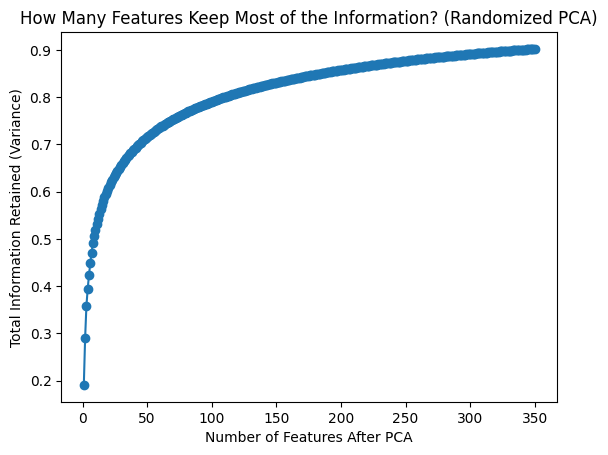

Optimal number of components: 329


In [13]:
#randomized PCA on flattened images (grayscale)

def perform_randomized_pca(data, n_components=350):
    rpca = PCA(n_components=n_components,
               svd_solver='randomized',
               iterated_power=2,
               random_state=42)  # keeps randomness consistent for fair comparison
    rpca.fit(data)
    explained_variance = np.cumsum(rpca.explained_variance_ratio_)
    return rpca, explained_variance


start = time.time()

rpca, rpca_variance = perform_randomized_pca(X_flattened)

end = time.time()

print(f"Time taken: {end - start:.4f} seconds")

# visualizing for randomized PCA
plt.figure()
plt.plot(range(1, len(rpca_variance) + 1), rpca_variance, marker='o', linestyle='-')
plt.xlabel('Number of Features After PCA')
plt.ylabel('Total Information Retained (Variance)')
plt.title('How Many Features Keep Most of the Information? (Randomized PCA)')
plt.show()

threshold = 0.90  # 90% variance
optimal_components = np.argmax(explained_variance >= threshold) + 1
print(f'Optimal number of components: {optimal_components}')

#print(f"Variance retained with 600 components: {explained_variance[599]:.4f}")

**Analysis and Conclusion:** We performed Randomized PCA to compare its efficiency and effectiveness against standard PCA. Our results showed that the explained variance and the number of components required were nearly identical between the two methods, which aligns with expectations since Randomized PCA is designed to be an approximation of standard PCA. Given that Randomized PCA is typically more efficient on very large datasets, we initially assumed it would significantly outperform standard PCA in terms of computation time. However, while it was indeed faster, the improvement was not substantial—with standard PCA taking 48 seconds and Randomized PCA taking 31 seconds, a difference of 17 seconds. This suggests that our dataset is not large enough for Randomized PCA to demonstrate a significant speed advantage, however it definitley still performs faster. Despite the marginal difference, we would still choose Randomized PCA as it offers potential efficiency benefits, particularly if applied to a larger dataset where its computational advantages would become more apparent.



**[2 points]  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?**

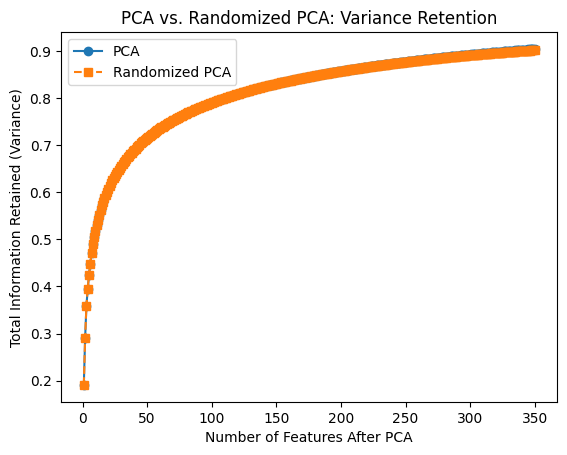

In [14]:
# graphing explained variance for PCA and Randomized PCA on the same graph to compare
plt.figure()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='PCA')
plt.plot(range(1, len(rpca_variance) + 1), rpca_variance, marker='s', linestyle='--', label='Randomized PCA')
plt.xlabel('Number of Features After PCA')
plt.ylabel('Total Information Retained (Variance)')
plt.title('PCA vs. Randomized PCA: Variance Retention')
plt.legend()
plt.show()


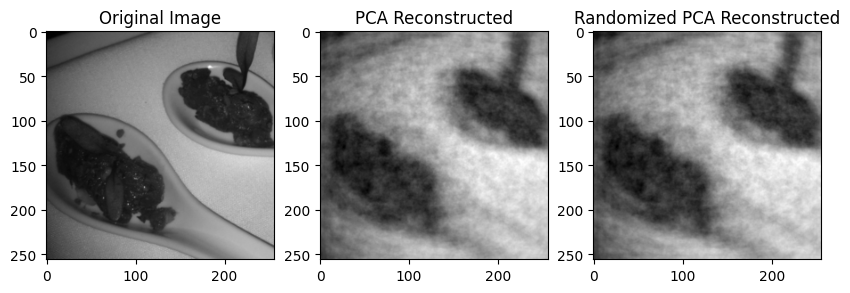

In [16]:
# Reconstruct an image using PCA and Randomized PCA
#just use the first image for testing (will be not pizza)
sample_image = X_flattened[0]

#using PCA
pca_transformed = pca.transform(sample_image.reshape(1, -1))
pca_reconstructed = pca.inverse_transform(pca_transformed)

#using Randomized PCA
rpca_transformed = rpca.transform(sample_image.reshape(1, -1))
rpca_reconstructed = rpca.inverse_transform(rpca_transformed)

#plotting original vs PCA vs Randomized PCA
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_image.reshape(256, 256), cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(pca_reconstructed.reshape(256, 256), cmap='gray')
plt.title("PCA Reconstructed")

plt.subplot(1, 3, 3)
plt.imshow(rpca_reconstructed.reshape(256, 256), cmap='gray')
plt.title("Randomized PCA Reconstructed")

plt.show()

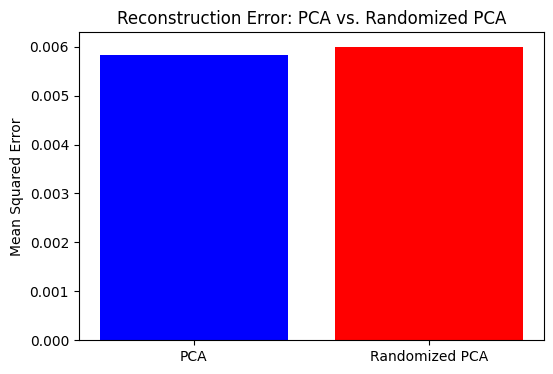

Mean Squared Error for PCA: 0.0058
Mean Squared Error for Randomized PCA: 0.0060


In [17]:
from sklearn.metrics import mean_squared_error

# compute mean squared error
def compute_mse(original_data, pca_model):
    transformed = pca_model.transform(original_data)  # Reduce dimensions
    reconstructed = pca_model.inverse_transform(transformed)  # Reconstruct images
    mse = np.mean([mean_squared_error(original, recon) for original, recon in zip(original_data, reconstructed)])
    return mse

# MSE for PCA and Randomized PCA and graph them
mse_pca = compute_mse(X_flattened, pca)
mse_rpca = compute_mse(X_flattened, rpca)


plt.figure(figsize=(6, 4))
plt.bar(["PCA", "Randomized PCA"], [mse_pca, mse_rpca], color=["blue", "red"])
plt.ylabel("Mean Squared Error")
plt.title("Reconstruction Error: PCA vs. Randomized PCA")
plt.show()


print(f"Mean Squared Error for PCA: {mse_pca:.4f}")
print(f"Mean Squared Error for Randomized PCA: {mse_rpca:.4f}")

**Comparing PCA vs. Randomized PCA:** Our PCA and Randomized PCA perform almost exactly the same in terms of variance retained for the number of components. The question seems to assume that one method—probably Randomized PCA—would need fewer components to achieve the same variance, but in our case, they are identical (as shown in the first graph).

To investigate further, we plotted a sample image along with its reconstructed versions after PCA and Randomized PCA. We noticed that both methods result in some blurring, as about 10% of the variance is lost, but the reconstructed images from both methods look the same.

Furthermore, we decied to look at Mean Squared Error between the two methods to see if there was a substantial difference there. Though there was a small difference (PCA had a MSE of .002 lower), this was not what we would consider a substantial difference. This leads us to believe that randomized PCA may be ever-so-slightly less-accurate, however as we saw it was much faster.

We’re not sure if the similarity components in PCA vs Randomized PCA is due to something in our implementation or if our dataset is just not large enough to show a difference, but either way, both methods are performing essentially the same for this dataset. That being said, as seen in our analysis in previous cells, since Randomized PCA runs faster, we would prefer to use it, especially on larger datasets where the speed difference would be more noticeable. Though it did have a slightly higher MSE, we think this is insignificant for a dataset of this size and we would still prefer to use this method.



**[1 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).**

In [18]:
# Feature extraction using DAISY
import numpy as np
from skimage.feature import daisy
from skimage.transform import resize

def extract_daisy_features(images, step=10, radius=15):
    feature_vectors = []
    for img in images:
        # Ensure proper image resizing
        #code below for resizing taken from chatgpt.com
        img_resized = resize(img, (64, 64), anti_aliasing=True)

        # DAISY expects grayscale images of shape (height, width)
        #code below taken/modified from "MachineLearningNotebooks 04. Dimension Reduction and Images.ipynb" by eclarson
        descs = daisy(img_resized, step=step, radius=radius, rings=2, histograms=8, orientations=8, visualize=False)

        # Flatten the descriptor into a 1D feature vector
        feature_vectors.append(descs.flatten())

    return np.array(feature_vectors)

# Apply DAISY feature extraction
daisy_features = extract_daisy_features(X_grayscale)

# Print feature shape to confirm extraction worked
print(f'DAISY feature shape: {daisy_features.shape}')  # Should be (num_images, num_features)




DAISY feature shape: (1966, 2176)


**[2 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.**

In [19]:
#Nearest Neighbor Classifier
#code for nearest neighbor classification taken/modified from "MachineLearningNotebooks 04. Dimension Reduction and Images.ipynb" by eclarson
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize k-NN classifier
knn_dsy = KNeighborsClassifier(n_neighbors=1)  # Using k=1 like in the example

# Split DAISY feature dataset into train/test sets
dsy_train, dsy_test, y_train, y_test = train_test_split(
    daisy_features, y, test_size=0.2, train_size=0.8, random_state=42) #use random state for consistency

# Fit classifier on DAISY features
knn_dsy.fit(dsy_train, y_train)

# Predict test set labels
y_pred = knn_dsy.predict(dsy_test)

# Compute accuracy
acc_dsy = accuracy_score(y_test, y_pred)

# Print results
print(f"DAISY k-NN Classification Accuracy: {100 * acc_dsy:.2f}%")


DAISY k-NN Classification Accuracy: 58.38%


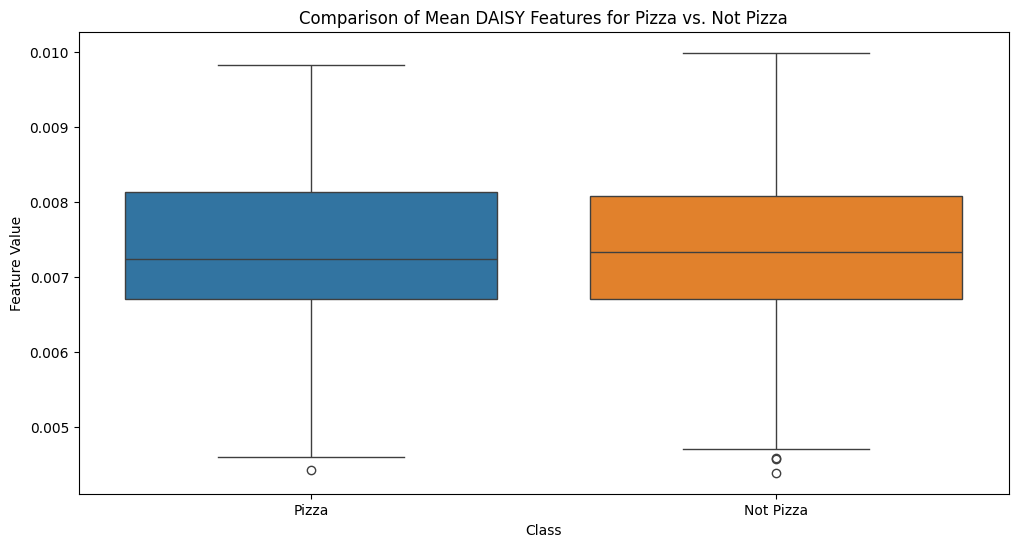

In [20]:
 #Visualize the differences between statistics of extracted features in each target class
import seaborn as sns

# Compute statistics of DAISY features
pizza_features = daisy_features[y == 1]  # Pizza images
not_pizza_features = daisy_features[y == 0]  # Not pizza images

# Compute mean feature values for both classes
pizza_mean = np.mean(pizza_features, axis=0)
not_pizza_mean = np.mean(not_pizza_features, axis=0)

# Create a boxplot to compare DAISY feature distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=[pizza_mean, not_pizza_mean], notch=False)

# Formatting
plt.xticks(ticks=[0, 1], labels=["Pizza", "Not Pizza"])
plt.xlabel("Class")
plt.ylabel("Feature Value")
plt.title("Comparison of Mean DAISY Features for Pizza vs. Not Pizza")
plt.show()


**Analysis:** The DAISY feature extraction method does not show strong promise for this prediction task. Using a k-Nearest Neighbors (k-NN) classifier, we achieved an accuracy of 58.38%, which is only slightly better than random guessing (50%). This suggests that DAISY features alone do not provide sufficient discriminatory power between pizza and not-pizza images. To further investigate, we visualized the distribution of DAISY feature values for each class using a boxplot. The boxplot shows that the feature distributions for pizza and not pizza images are highly similar, with significant overlap in their interquartile ranges and medians. This indicates that DAISY does not capture meaningful differences between the two classes. Since DAISY primarily detects texture-based patterns, it may not be well-suited for classifying food images, where color, shape, and high-level structural information are more important. An alternative approach could be color historgrams or a Histogram of Oriented Gradients (HOG), which could provide better classification performance by capturing more relevant features for distinguishing pizza from non-pizza images.

**Exceptional Work (1 points total): You have free reign to provide any additional analyses.**

In [21]:
#HOG feature extraction and accuracy
from skimage.feature import hog
from skimage.transform import resize
import numpy as np

# Function to extract HOG features, code help from chatgpt.com
def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    feature_vectors = []
    for img in images:
        # Resize to a smaller, consistent size (HOG works better on smaller inputs)
        img_resized = resize(img, (64, 64), anti_aliasing=True)

        # Extract HOG features
        features = hog(img_resized,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=False)

        feature_vectors.append(features)

    return np.array(feature_vectors)

# Apply HOG to grayscale images
hog_features = extract_hog_features(X_grayscale)

# Print shape of HOG features
print(f"HOG feature shape: {hog_features.shape}")  # Should be (num_images, num_features)






#Run KNN again to see HOG accuracy, code modified from previous KNN function (by eclarson)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize k-NN classifier
knn_hog = KNeighborsClassifier(n_neighbors=1)

# Split data into training and testing sets
hog_train, hog_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.2, random_state=42) #use random_state for consistency

# Train the classifier
knn_hog.fit(hog_train, y_train)

# Predict and calculate accuracy
y_pred_hog = knn_hog.predict(hog_test)
acc_hog = accuracy_score(y_test, y_pred_hog)

# Print results
print(f"HOG k-NN Classification Accuracy: {100 * acc_hog:.2f}%")


HOG feature shape: (1966, 1764)
HOG k-NN Classification Accuracy: 57.87%


**Analysis:** Histogram of Oriented Gradients (HOG) was applied as a feature extraction method to classify pizza vs. not-pizza images using a k-NN classifier. The resulting classification accuracy was 57.38%, which is nearly identical to DAISY's 58.12% accuracy. This suggests that HOG is not significantly better at distinguishing the two classes. Since HOG primarily captures edge structures and gradients, it may struggle with this classification task due to the high variability in pizza appearances—different toppings, crust shapes, and backgrounds could create misleading gradient patterns. The lack of meaningful improvement over DAISY indicates that edge-based features alone are not sufficient for accurate classification. Given that pizza images often contain distinctive colors (red sauce, yellow cheese, brown crust), a color-based feature extraction method such as color histograms may be more effective. In the next step, I will extract color histograms in the HSV color space and evaluate their effectiveness in improving classification performance.

In [22]:
#Color Histogram for feature extraction and accuracy
import cv2
import numpy as np

# Function to extract color histograms, code help from chatgpt.com
def extract_color_histograms(images, bins=(8, 8, 8)):
    feature_vectors = []
    for img in images:
        # Convert from (3, 256, 256) to (256, 256, 3) for OpenCV
        img_rgb = np.transpose(img, (1, 2, 0))  # Change from (C, H, W) to (H, W, C)

        # Convert to HSV (better for color-based tasks)
        img_hsv = cv2.cvtColor((img_rgb * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)

        # Compute histogram for each channel (H, S, V)
        hist = cv2.calcHist([img_hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])

        # Normalize histogram and flatten to 1D array
        hist = cv2.normalize(hist, hist).flatten()

        feature_vectors.append(hist)

    return np.array(feature_vectors)

# Apply color histogram extraction (using the original RGB dataset `X`)
color_features = extract_color_histograms(X)

# Print feature shape
print(f"Color Histogram Feature Shape: {color_features.shape}")  # (num_images, num_features)





#Now KNN for color historgrams accuracy, code modified from previous KNN function (by eclarson)

# Train-test split
color_train, color_test, y_train, y_test = train_test_split(color_features, y, test_size=0.2, random_state=42) #use random state for consistency

# Train k-NN
knn_color = KNeighborsClassifier(n_neighbors=1)
knn_color.fit(color_train, y_train)

# Predict and compute accuracy
y_pred_color = knn_color.predict(color_test)
acc_color = accuracy_score(y_test, y_pred_color)

print(f"Color Histogram k-NN Classification Accuracy: {100 * acc_color:.2f}%")


Color Histogram Feature Shape: (1966, 512)
Color Histogram k-NN Classification Accuracy: 63.96%


**Analysis:** After testing DAISY (58.38%) and HOG (57.87%), I explored color histograms in the HSV color space as an alternative feature extraction method. The intuition behind this choice is that pizza images have distinctive colors (e.g., red sauce, yellow cheese, brown crust), making color-based features more useful than edge or texture-based methods. Using a k-NN classifier on color histograms, the model achieved an accuracy of 63.96%, outperforming both DAISY and HOG. This suggests that color information is more relevant for distinguishing pizza from non-pizza images. While 63.96% is still not perfect, it demonstrates that color features contribute more meaningful distinctions in this classification problem.

In [27]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/ML_LAB2/Lab2Pizza.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML_LAB2/Lab2Pizza.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1784875 bytes to /content/drive/My Drive/Colab Notebooks/ML_LAB2/Lab2Pizza.html


In [28]:
from google.colab import files
files.download("/content/drive/My Drive/Colab Notebooks/ML_LAB2/Lab2Pizza.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>